<a href="https://colab.research.google.com/github/GParolini/microgrid_model/blob/main/macrogrid_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generating the time-dependent emission data for the Colorado macrogrid

In [4]:
# Data are extracted from the data portal of https://portal.electricitymaps.com/datasets.
# Historical data available in the portal are licensed under the Open Data Commons Open Database license (ODbL).
# The data used are related to 2024. 2024 was a leap year. In order to generate data suitable for the modelling of a standard year,
# the information related to February 29th must be removed.

df = pd.read_csv("/content/drive/MyDrive/US-NW-WACM_2024_hourly.csv")

In [5]:
df.dtypes


,0
Datetime (UTC),object
Country,object
Zone Name,object
Zone Id,object
Carbon Intensity gCO₂eq/kWh (direct),float64
Carbon Intensity gCO₂eq/kWh (LCA),float64
Low Carbon Percentage,float64
Renewable Percentage,float64
Data Source,object
Data Estimated,bool


In [6]:
# Setting the Datetime column to appropriate format to extract the dataframe rows related to February 29th

df["Datetime (UTC)"] = pd.to_datetime(df["Datetime (UTC)"])

In [7]:
df[0:30]

,Datetime (UTC),Country,Zone Name,Zone Id,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,Data Source,Data Estimated,Data Estimation Method
0,2024-01-01 00:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,762.67,793.30,23.08,22.80,eia.gov,False,NaN
1,2024-01-01 01:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,748.62,779.06,24.47,24.30,eia.gov,False,NaN
2,2024-01-01 02:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,744.13,773.32,25.47,25.31,eia.gov,False,NaN
3,2024-01-01 03:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,746.03,775.21,25.19,25.05,eia.gov,False,NaN
4,2024-01-01 04:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,734.53,763.26,26.32,26.09,eia.gov,False,NaN
5,2024-01-01 05:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,717.46,746.48,27.60,27.37,eia.gov,False,NaN
6,2024-01-01 06:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,716.01,745.68,27.19,26.80,eia.gov,False,NaN
7,2024-01-01 07:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,690.21,719.32,29.98,29.81,eia.gov,False,NaN
8,2024-01-01 08:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,706.64,735.81,28.43,28.14,eia.gov,False,NaN
9,2024-01-01 09:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,700.80,730.46,28.74,28.55,eia.gov,False,NaN


In [8]:
df.dtypes

,0
Datetime (UTC),datetime64[ns]
Country,object
Zone Name,object
Zone Id,object
Carbon Intensity gCO₂eq/kWh (direct),float64
Carbon Intensity gCO₂eq/kWh (LCA),float64
Low Carbon Percentage,float64
Renewable Percentage,float64
Data Source,object
Data Estimated,bool


In [9]:
# Selecting the data for 29th February 2024 in a dataframe

df_29_feb = df[(df["Datetime (UTC)"] >= "2024-02-29 00:00:00") & (df["Datetime (UTC)"] <= "2024-02-29 23:00:00")]

In [10]:
# Removing the dataframe for 29th February from the main dataset to have a standard year

df_std_year = df.merge(df_29_feb, how='left', indicator=True)
df_std_year = df_std_year[df_std_year['_merge'] == 'left_only'].reset_index(drop=True)
df_std_year

,Datetime (UTC),Country,Zone Name,Zone Id,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,Data Source,Data Estimated,Data Estimation Method,_merge
0,2024-01-01 00:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,762.67,793.30,23.08,22.80,eia.gov,False,NaN,left_only
1,2024-01-01 01:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,748.62,779.06,24.47,24.30,eia.gov,False,NaN,left_only
2,2024-01-01 02:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,744.13,773.32,25.47,25.31,eia.gov,False,NaN,left_only
3,2024-01-01 03:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,746.03,775.21,25.19,25.05,eia.gov,False,NaN,left_only
4,2024-01-01 04:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,734.53,763.26,26.32,26.09,eia.gov,False,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2024-12-31 19:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,718.28,743.80,29.92,29.63,eia.gov,False,NaN,left_only
8756,2024-12-31 20:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,706.88,733.25,30.52,30.21,eia.gov,False,NaN,left_only
8757,2024-12-31 21:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,672.96,700.85,32.90,32.57,eia.gov,False,NaN,left_only
8758,2024-12-31 22:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,671.27,697.51,33.78,33.40,eia.gov,False,NaN,left_only


In [11]:
# Recomputing the direct carbon emissions in KgCO₂eq/kWh to make them compatible with the other data used in the model
df_std_year["Carbon Intensity kgCO₂eq/kWh (direct)"] = df_std_year["Carbon Intensity gCO₂eq/kWh (direct)"]/1000
df_std_year

,Datetime (UTC),Country,Zone Name,Zone Id,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,Data Source,Data Estimated,Data Estimation Method,_merge,Carbon Intensity kgCO₂eq/kWh (direct)
0,2024-01-01 00:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,762.67,793.30,23.08,22.80,eia.gov,False,NaN,left_only,0.76267
1,2024-01-01 01:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,748.62,779.06,24.47,24.30,eia.gov,False,NaN,left_only,0.74862
2,2024-01-01 02:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,744.13,773.32,25.47,25.31,eia.gov,False,NaN,left_only,0.74413
3,2024-01-01 03:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,746.03,775.21,25.19,25.05,eia.gov,False,NaN,left_only,0.74603
4,2024-01-01 04:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,734.53,763.26,26.32,26.09,eia.gov,False,NaN,left_only,0.73453
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2024-12-31 19:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,718.28,743.80,29.92,29.63,eia.gov,False,NaN,left_only,0.71828
8756,2024-12-31 20:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,706.88,733.25,30.52,30.21,eia.gov,False,NaN,left_only,0.70688
8757,2024-12-31 21:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,672.96,700.85,32.90,32.57,eia.gov,False,NaN,left_only,0.67296
8758,2024-12-31 22:00:00,USA,Western Area Power Administration - Rocky Moun...,US-NW-WACM,671.27,697.51,33.78,33.40,eia.gov,False,NaN,left_only,0.67127


In [20]:
df_std_year.dtypes

,0
Datetime (UTC),datetime64[ns]
Country,object
Zone Name,object
Zone Id,object
Carbon Intensity gCO₂eq/kWh (direct),float64
Carbon Intensity gCO₂eq/kWh (LCA),float64
Low Carbon Percentage,float64
Renewable Percentage,float64
Data Source,object
Data Estimated,bool


In [25]:
df_co2_em = df_std_year.set_index("Datetime (UTC)")
df_co2_em.resample('D')["Carbon Intensity kgCO₂eq/kWh (direct)"].sum()
df_co2_em = pd.DataFrame(df_co2_em.resample('D')["Carbon Intensity kgCO₂eq/kWh (direct)"].sum())

Text(0, 0.5, 'Daily Carbon Intensity (kgCO₂eq/kWh)')

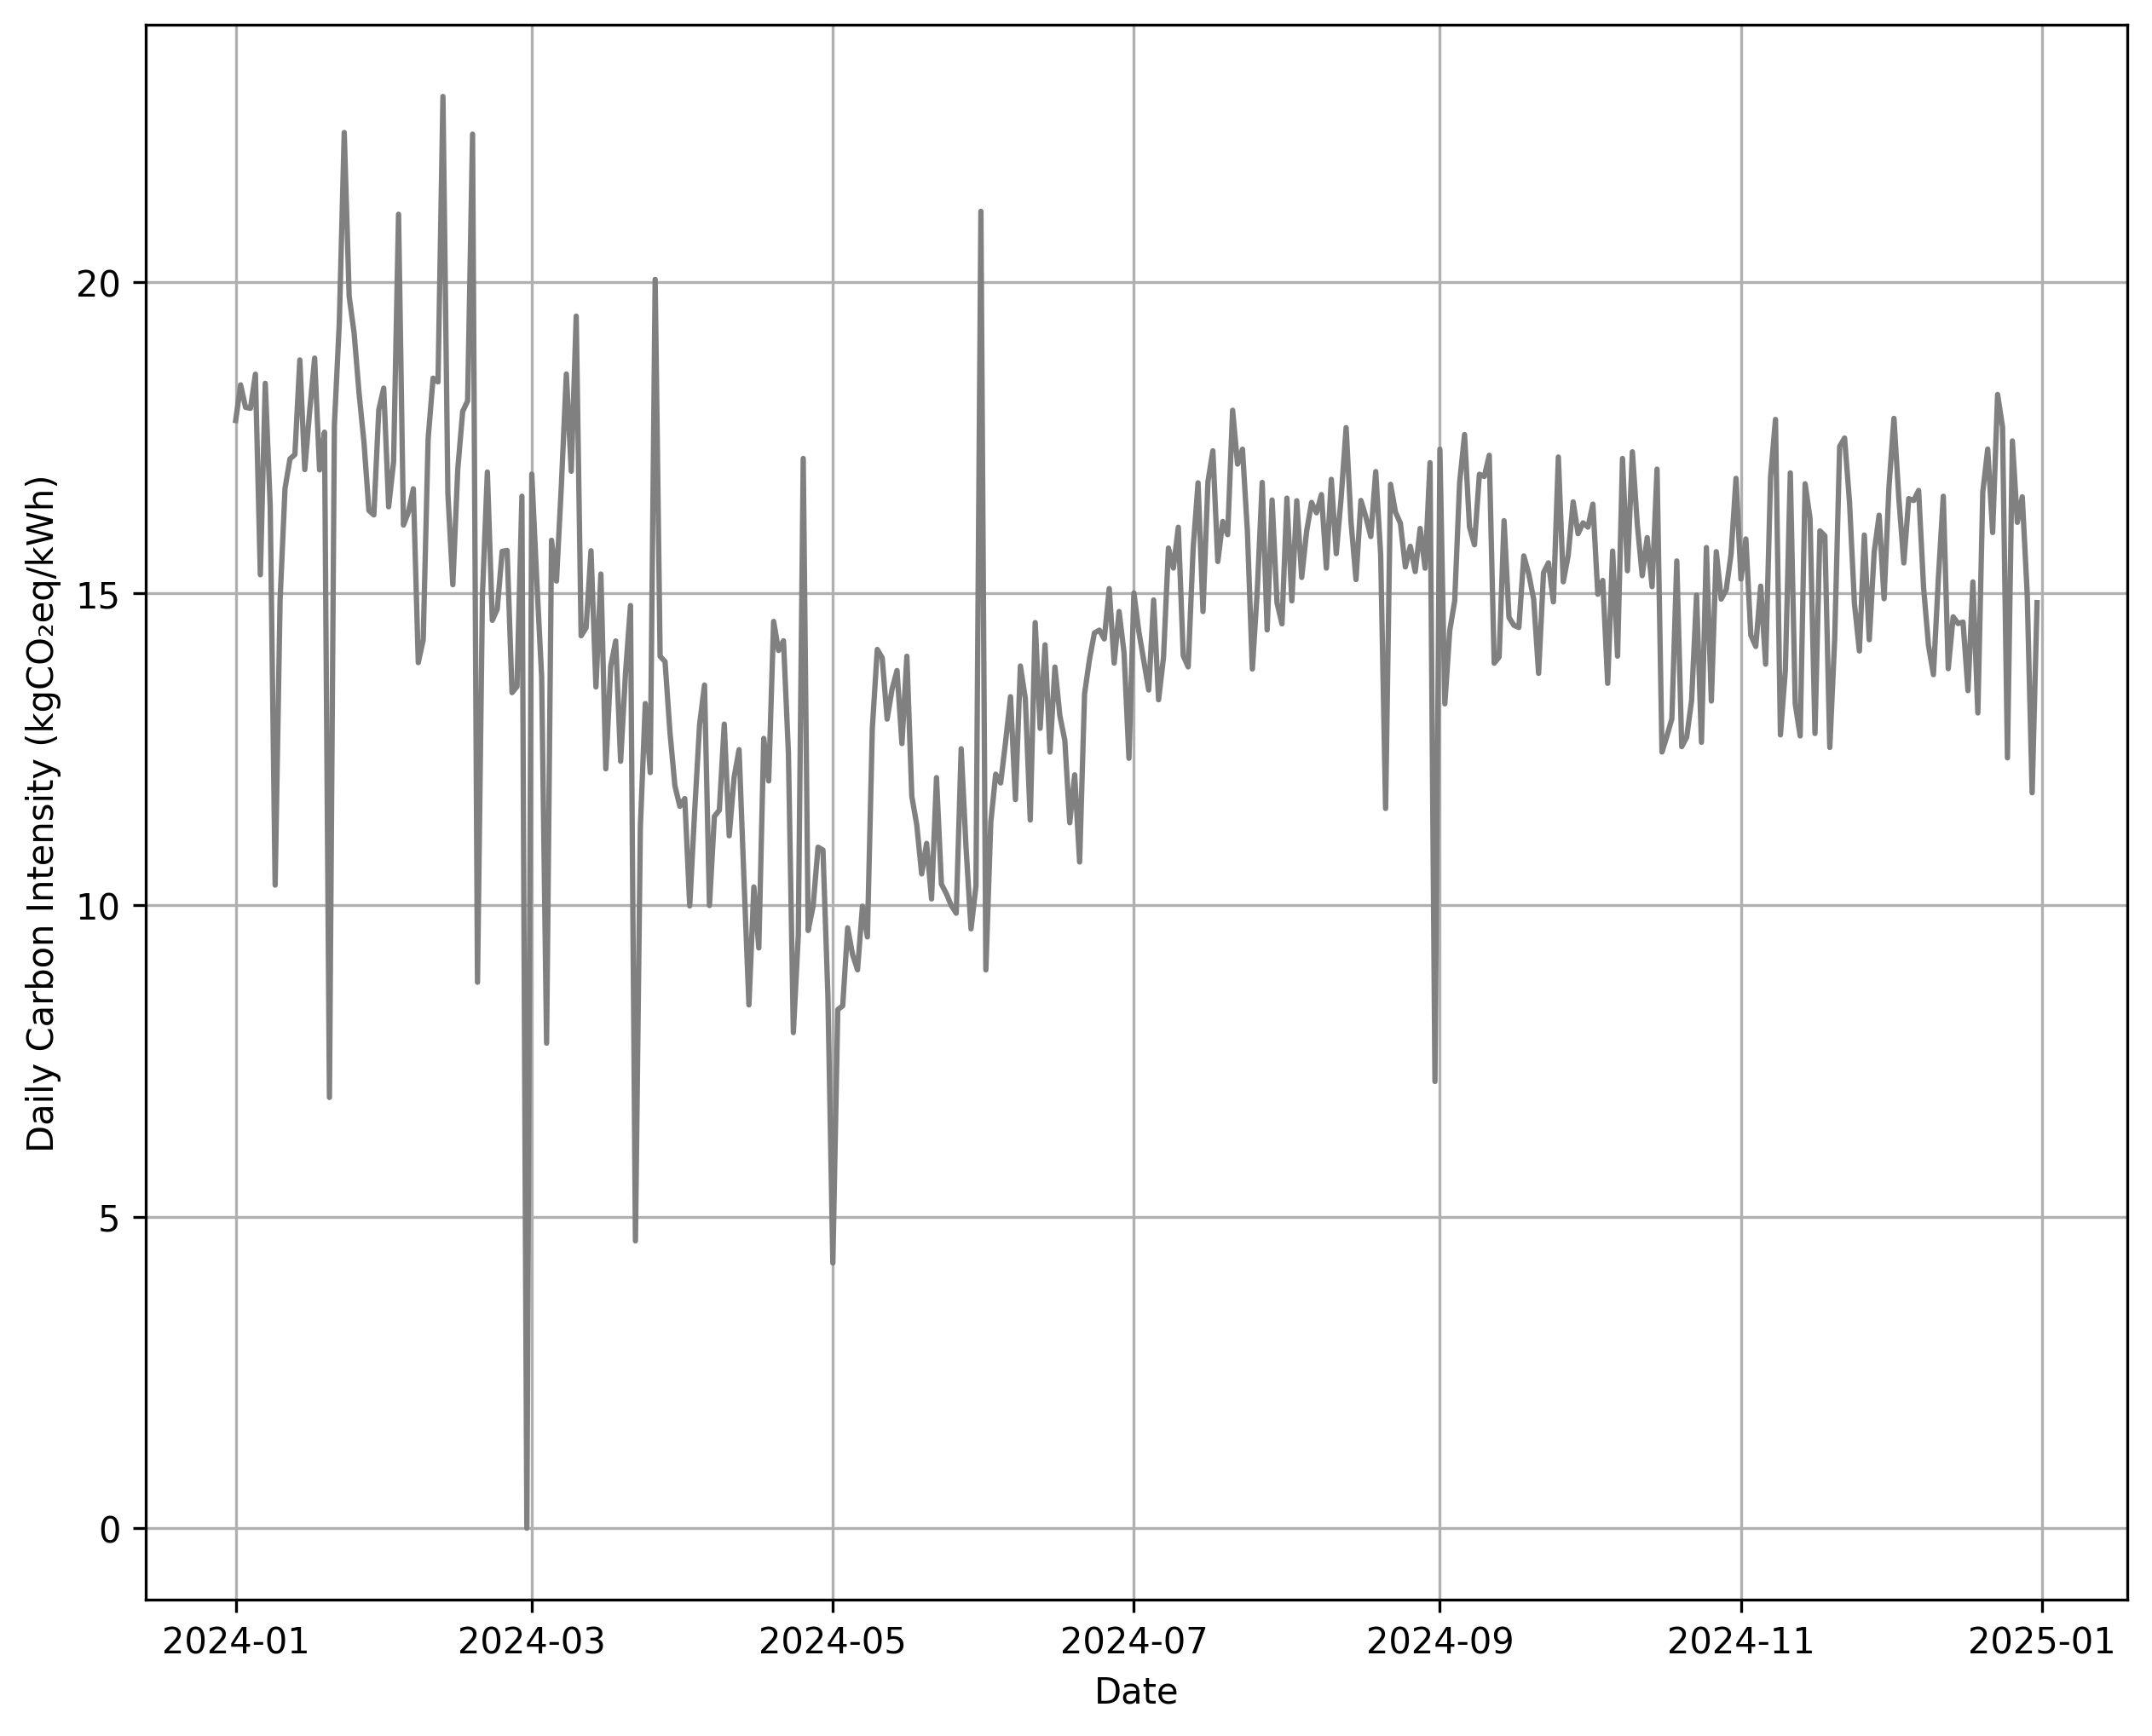

In [41]:
x = df_co2_em.index.to_list()
y = df_co2_em["Carbon Intensity kgCO₂eq/kWh (direct)"].to_list()

plt.figure(figsize=(10,8), dpi=300)
plt.grid()
plt.plot(x,y, color="grey")
plt.xlabel("Date")
plt.ylabel("Daily Carbon Intensity (kgCO₂eq/kWh)")

In [26]:
df_co2_em

,Carbon Intensity kgCO₂eq/kWh (direct)
Datetime (UTC),
2024-01-01,17.77750
2024-01-02,18.34948
2024-01-03,17.98896
2024-01-04,17.97262
2024-01-05,18.52102
...,...
2024-12-27,16.14275
2024-12-28,16.55191
2024-12-29,14.99817


In [12]:
index_lst = [f"t{x}" for x in range(0,8760)]
em_lst = [round(float(x), 4) for x in df_std_year["Carbon Intensity kgCO₂eq/kWh (direct)"].tolist()]
df_gams_em = pd.DataFrame(list(zip(index_lst, em_lst)), columns=["Index","Em"])
df_gams_em.to_csv("Em.csv", index=False)

## Generating the time-dependent cost data for the Colorado macrogrid

In [13]:
# Current prices set by Xcel Energy (the company that supplies the NREL RSF facility) are used as reference
# The Time of Use residential rates for Colorado are used
# This type of tarif has rates for off-peak, mid-peak, and peak electricity use different in winter and summer
# Weekends are always off-peak
# Holidays will not be specified (minimal error)

In [14]:
# Winter rates (October 1st - May 31st) in $. To the rates a fixed amount of 20% will be added to consider taxes and other costs involved with energy distribution
# The percentage is low because it is assumed that business customers, like a data centre, are likely to pay more favourable rates than
# residential customers. The small amount of overhead computed should make up for this difference.

winter_off = 0.07749 * (1+0.2)
winter_mid = 0.10460 * (1+0.2)
winter_peak = 0.13171 * (1+0.2)

In [15]:
# Summer rates (June 1st - September 30th) in $. They are computed similarly to the winter rates.

summer_off = 0.07749 * (1+0.2)
summer_mid = 0.14332 * (1+0.2)
summer_peak = 0.20915 * (1+0.2)


In [17]:
url= "https://data.openei.org/files/358/rsfmeasureddata2011.csv" #Dataset URL

df1 = pd.read_csv(url)

df1 = df1.drop(df1.columns[-1],axis=1) #The last column of the csv file is empty and generates an empty dataframe column
df1 #Final dataframe generated from the csv file

HTTPError: HTTP Error 504: Gateway Time-out

In [ ]:
df1['Date and Time'] = pd.to_datetime(df1['Date and Time'])

In [ ]:
# Adding a "month column" to provide monthly statistics
df1["Month"] = df1['Date and Time'].dt.month

In [ ]:
# Adding a "day column" to provide daily statistics
df1["Day"] = df1['Date and Time'].dt.day

In [ ]:
# Adding a "hour column" to provide hourly statistics
df1["Hour"] = df1['Date and Time'].dt.hour

In [ ]:
df1

In [ ]:
# Creating a placeholder column for the electricity price.
# Regardless of the season electricity is sold at off-peak rates during weekends and during most hours of the day.
# The off-peak rate is the same in winter and summer.
# I can, therefore, start to fill in all the days of the year with the winter off-peak rate
# and changing afterwards the mid-peak and peak values.

df1["Grid Price $"] = winter_off

In [ ]:
# Winter season
winter_months = [10, 11, 12, 1, 2, 3, 4, 5]
workday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
for month in winter_months:
  for day in workday:
    df1.loc[(df1['Month'] == month) & (df1['Day of Week'] == day)
                         & (df1['Hour'] == 13), "Grid Price $"] = winter_mid
    df1.loc[(df1['Month'] == month) & (df1['Day of Week'] == day)
                         & (df1['Hour'] == 14), "Grid Price $"] = winter_mid
    df1.loc[(df1['Month'] == month) & (df1['Day of Week'] == day)
                         & (df1['Hour'] == 15), "Grid Price $"] = winter_peak
    df1.loc[(df1['Month'] == month) & (df1['Day of Week'] == day)
                         & (df1['Hour'] == 16), "Grid Price $"] = winter_peak
    df1.loc[(df1['Month'] == month) & (df1['Day of Week'] == day)
                         & (df1['Hour'] == 17), "Grid Price $"] = winter_peak
    df1.loc[(df1['Month'] == month) & (df1['Day of Week'] == day)
                         & (df1['Hour'] == 18), "Grid Price $"] = winter_peak


In [ ]:
# Summer season
summer_months = [6, 7, 8, 9]
for month in summer_months:
  for day in workday:
    df1.loc[(df1['Month'] == month) & (df1['Day of Week'] == day)
                         & (df1['Hour'] == 13), "Grid Price $"] = summer_mid
    df1.loc[(df1['Month'] == month) & (df1['Day of Week'] == day)
                         & (df1['Hour'] == 14), "Grid Price $"] = summer_mid
    df1.loc[(df1['Month'] == month) & (df1['Day of Week'] == day)
                         & (df1['Hour'] == 15), "Grid Price $"] = summer_peak
    df1.loc[(df1['Month'] == month) & (df1['Day of Week'] == day)
                         & (df1['Hour'] == 16), "Grid Price $"] = summer_peak
    df1.loc[(df1['Month'] == month) & (df1['Day of Week'] == day)
                         & (df1['Hour'] == 17), "Grid Price $"] = summer_peak
    df1.loc[(df1['Month'] == month) & (df1['Day of Week'] == day)
                         & (df1['Hour'] == 18), "Grid Price $"] = summer_peak

In [ ]:
index_lst = [f"t{x}" for x in range(0,8760)]
cm_lst = [round(float(x), 6) for x in df1["Grid Price $"].tolist()]
df_gams_cm = pd.DataFrame(list(zip(index_lst, cm_lst)), columns=["Index","Cm"])
df_gams_cm.to_csv("Cm.csv", index=False)